# Лабораторная работа № 4 - Обработка текстов


 **Постановка задачи:** Провести предварительную обработку текста набора данных, содержащих информацию по сообществам социальной сети ВКонтакте,  которые предлагают учебные материалы для старшеклассников и студентов,  направленные на подготовку к олимпиадам и экзаменам.

 Структура набора данных:

 id - идентификатор сообщества в ВК

 URL - адрес сообщества

 Название - название сообщества

 Предмет - идентификатор предмета (разметка для классификатора).

 Необходимо решить следующие задачи предварительной обработки:

 1) Загрузка данных

 2) Предварительный анализ и визуализация данных

 3) Токенизация - разбиение на слова

 4) Удаление стоп-слов
 
 5) Стемминг - приведение к основе слова

 6) Векторизация 

 

*Использовать большие куски готового кода в анализе данных частая практика. Цель понять данные и нужным образом их трансформировать, провести анализ, а код - просто инструмент.*


## Загрузка набора данных



In [2]:
#Загрузка из удаленного источника
!gdown --id 1KRpL2q6RZn1YHI2IfFeTKxuKpEUQNenZ


'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import os
import pandas as pd # Библиотека для работы с таблицами
import numpy as np # Библиотека для работы с массивами и матрицами
import matplotlib.pyplot as plt #библиотека для графики

In [6]:
df = pd.read_csv('groups.csv',';').drop('Unnamed: 4',axis = 1)
df


C:\Users\nevil\AppData\Local\Temp\ipykernel_31984\679415908.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('groups.csv',';').drop('Unnamed: 4',axis = 1)


id                           URL  \
0      72894053   https://vk.com/club72894053   
1      47693493   https://vk.com/club47693493   
2      37948240   https://vk.com/club37948240   
3     109143834  https://vk.com/club109143834   
4      32140813   https://vk.com/club32140813   
...         ...                           ...   
1784   43732804   https://vk.com/club43732804   
1785   28799949   https://vk.com/club28799949   
1786   42832964   https://vk.com/club42832964   
1787   40575907   https://vk.com/club40575907   
1788     938295     https://vk.com/club938295   

                                               Название        Предмет  
0      Биология: материалы к олимпиадам и экзаменам           биология  
1     Биология+химия-easy;) c Aleksandra LearnBiolog...       биология  
2                                     Биология                биология  
3                         B.o.S - Биология Спорта             биология  
4                            Углублённый Биолог               биология  
...                                                 ...            ...  
1784                                Кодексы и законы РФ  юриспруденция  
1785                                           Закон.ру  юриспруденция  
1786                                      Колледж АлтГУ            вуз  
1787                                       КиберЛенинка          наука  
1788                                     ИРНИТУ (ИрГТУ)            вуз  

[1789 rows x 4 columns]

In [8]:
df.to_csv('groups12.csv', index=False)
df

id                           URL  \
0      72894053   https://vk.com/club72894053   
1      47693493   https://vk.com/club47693493   
2      37948240   https://vk.com/club37948240   
3     109143834  https://vk.com/club109143834   
4      32140813   https://vk.com/club32140813   
...         ...                           ...   
1784   43732804   https://vk.com/club43732804   
1785   28799949   https://vk.com/club28799949   
1786   42832964   https://vk.com/club42832964   
1787   40575907   https://vk.com/club40575907   
1788     938295     https://vk.com/club938295   

                                               Название        Предмет  
0      Биология: материалы к олимпиадам и экзаменам           биология  
1     Биология+химия-easy;) c Aleksandra LearnBiolog...       биология  
2                                     Биология                биология  
3                         B.o.S - Биология Спорта             биология  
4                            Углублённый Биолог               биология  
...                                                 ...            ...  
1784                                Кодексы и законы РФ  юриспруденция  
1785                                           Закон.ру  юриспруденция  
1786                                      Колледж АлтГУ            вуз  
1787                                       КиберЛенинка          наука  
1788                                     ИРНИТУ (ИрГТУ)            вуз  

[1789 rows x 4 columns]

In [9]:
# Приведение идентификатора класса к числовому виду - символьное название предмета заменяем на код класса и записываем его в колонку Label
classes = {class_:i for i, class_ in enumerate(df['Предмет'].unique())}
df['label'] = df['Предмет'].replace(classes)

In [10]:
df

id                           URL  \
0      72894053   https://vk.com/club72894053   
1      47693493   https://vk.com/club47693493   
2      37948240   https://vk.com/club37948240   
3     109143834  https://vk.com/club109143834   
4      32140813   https://vk.com/club32140813   
...         ...                           ...   
1784   43732804   https://vk.com/club43732804   
1785   28799949   https://vk.com/club28799949   
1786   42832964   https://vk.com/club42832964   
1787   40575907   https://vk.com/club40575907   
1788     938295     https://vk.com/club938295   

                                               Название        Предмет  label  
0      Биология: материалы к олимпиадам и экзаменам           биология      0  
1     Биология+химия-easy;) c Aleksandra LearnBiolog...       биология      0  
2                                     Биология                биология      0  
3                         B.o.S - Биология Спорта             биология      0  
4                            Углублённый Биолог               биология      0  
...                                                 ...            ...    ...  
1784                                Кодексы и законы РФ  юриспруденция     18  
1785                                           Закон.ру  юриспруденция     18  
1786                                      Колледж АлтГУ            вуз     19  
1787                                       КиберЛенинка          наука     20  
1788                                     ИРНИТУ (ИрГТУ)            вуз     19  

[1789 rows x 5 columns]

## Предварительный анализ и визуализация данных

Задания:


*   Нарисовать гистограмму на основе колонки "Предмет". Узнать баланс классов(число экземпляров - число сообществ каждого класса)
*   Посмотреть среднее количество слов колонки "Название"



In [11]:
# Cмотрим на данные - какие есть предметы
df['Предмет']



0            биология
1            биология
2            биология
3            биология
4            биология
            ...      
1784    юриспруденция
1785    юриспруденция
1786              вуз
1787            наука
1788              вуз
Name: Предмет, Length: 1789, dtype: object

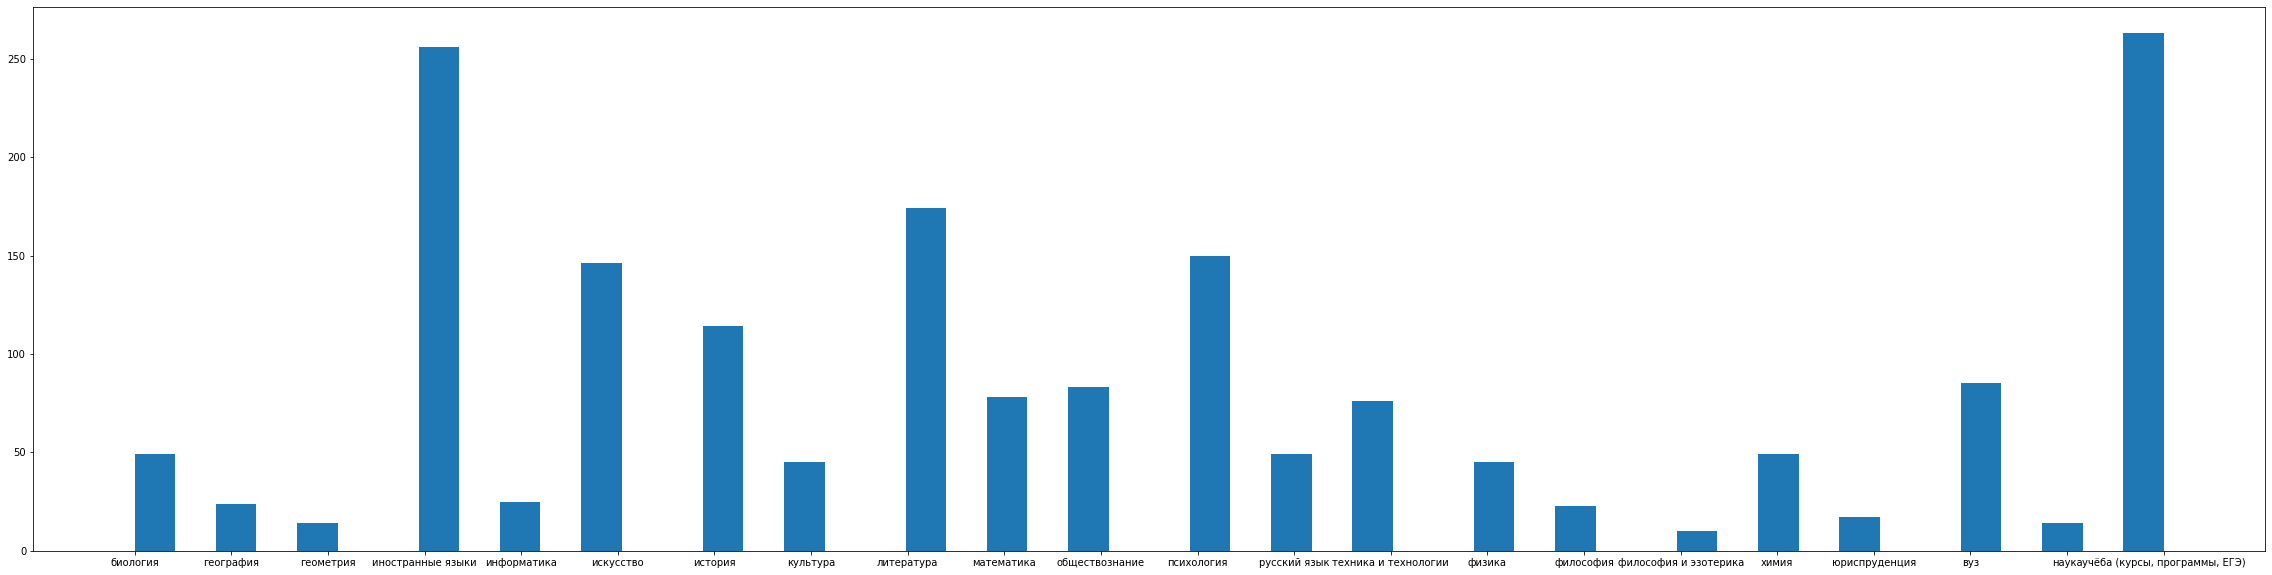

In [15]:
# Гистограмма на основе колонки "Предмет"
plt.figure(figsize=(40, 10)) #Установка размера гистограммы для хорошего отображения подписей по оси X
plt.hist(df['Предмет'], bins= 50)
plt.show()


In [15]:
# Среднее количество слов колонки "Название"
count_words = lambda x: len(x.split()) #Лямбда-функция подсчета количества слов

def count_words(x):
  return len(x.split())

In [16]:
df['count_words'] = df['Название'].apply(count_words) #Вызов функции подсчета количества слов и дополнение набора данных колонкой count_words

In [17]:
df.head()

id                           URL  \
0   72894053   https://vk.com/club72894053   
1   47693493   https://vk.com/club47693493   
2   37948240   https://vk.com/club37948240   
3  109143834  https://vk.com/club109143834   
4   32140813   https://vk.com/club32140813   

                                            Название   Предмет  label  \
0   Биология: материалы к олимпиадам и экзаменам      биология      0   
1  Биология+химия-easy;) c Aleksandra LearnBiolog...  биология      0   
2                                  Биология           биология      0   
3                      B.o.S - Биология Спорта        биология      0   
4                         Углублённый Биолог          биология      0   

   count_words  
0            6  
1            4  
2            1  
3            4  
4            2

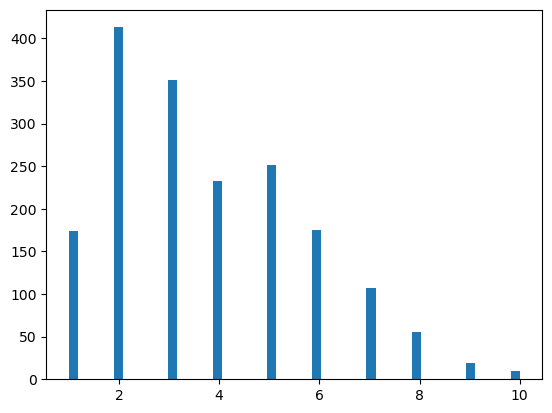

In [18]:
plt.hist(df['count_words'], bins= 50)    
plt.show()

In [20]:
#Вычисление среднего количества слов колонки
mean_count_words = df.count_words.mean()
mean_count_words

3.777529346003354

 **Вывод: В колонке Название не более 10 слов, среднее число слов  - 3, 7775**

# Обработка данных

Задания:

*   Сделать стеммированную колонку в **df** на основе колонки **df**['Название']. 
*   Очистить от стоп слов, пунктуации 


In [21]:
from sklearn.model_selection import cross_val_score # функция подсчета точности
from sklearn.model_selection import train_test_split # функция разбиения на обучающую и тестовую выборку
from sklearn.feature_extraction.text import TfidfVectorizer # векторайзер - преобразует тексты в машинный вид
from sklearn.linear_model import LinearRegression # Модель машинного обучения
from sklearn.metrics import mean_absolute_error # Метрика для оценки ошибки

import nltk # Библиотека для работы с текстами
from nltk.tokenize import word_tokenize, sent_tokenize # токенайзер - разбивает непрерывный текст на токены(слова)
from nltk.stem.snowball import SnowballStemmer # стеммер - преобразует тексты к начальной форме
from nltk.corpus import stopwords # список незначимых слов - я, ты, он, она, там и тд

nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data

[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\nevil\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\wordnet2022.zip.
[nltk_data]    | Downloading package wo

True

In [22]:
import string   # Знаки пунктуации
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
import string # Список знаков пунктуации
punctuations = list(string.punctuation)
punctuations

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [24]:
#  Проеобразование набора  стоп-слов в set (множество) -  нужно для того, чтобы поиск по словам был быстрее 
from nltk.corpus import stopwords

ru_stop_words = set(stopwords.words('russian'))

In [26]:
stemmer_ru = SnowballStemmer("russian") 
ru_stop_words = set(stopwords.words('russian'))
def stemm_text(text, stemmer, stop_words):
    """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам"""
    tokens = [stemmer.stem(word) for word in word_tokenize(text.lower()) if word not in stop_words]
    tokens = ' '.join(tokens)
    return tokens


In [27]:
df['stemmed_Название'] = df['Название'].apply(lambda x: stemm_text(x, stemmer_ru, ru_stop_words)) # генерируем колонку stemmed_Название, прогоняя значения колонки Название через функцию обработки

In [28]:
df['stemmed_Название']

0                   биолог : материал олимпиад экзамен
1       биология+химия-еас ; ) c aleksandr learnbiolog
2                                               биолог
3                                 b.o.s - биолог спорт
4                                      углублен биолог
                             ...                      
1784                                   кодекс закон рф
1785                                           закон.р
1786                                      колледж алтг
1787                                       киберленинк
1788                                    ирнит ( иргт )
Name: stemmed_Название, Length: 1789, dtype: object

In [29]:
def text_processing(text, stemmer, stop_words, punct):
    """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам и удаляя знаки пунктуации"""
    text = text.lower()
    words = word_tokenize(text) # С помощью токенизации разбиваем текст на токены 
    words = [word for word in words if word not in stop_words] # Удаляем стопслова
    words = [word for word in words if word not in punct] # Удаляем знаки пунктуации
    
    words = [stemmer.stem(word) for word in words] # стеммируем каждое слово
    new_text = ' '.join(words)

    return new_text

In [32]:
def text_proc(x):
  return text_processing(x, stemmer_ru, ru_stop_words, punctuations)


df['filtered_and_stemmed_Название'] = df['Название'].apply(text_proc)

In [34]:
df['filtered_and_stemmed_Название'] 

0                   биолог материал олимпиад экзамен
1       биология+химия-еас c aleksandra learnbiology
2                                             биолог
3                                 b.o.s биолог спорт
4                                    углублен биолог
                            ...                     
1784                                 кодекс закон рф
1785                                         закон.р
1786                                    колледж алтг
1787                                     киберленинк
1788                                      ирнит иргт
Name: filtered_and_stemmed_Название, Length: 1789, dtype: object

In [35]:
df.head(10)


id                           URL  \
0   72894053   https://vk.com/club72894053   
1   47693493   https://vk.com/club47693493   
2   37948240   https://vk.com/club37948240   
3  109143834  https://vk.com/club109143834   
4   32140813   https://vk.com/club32140813   
5   64610323   https://vk.com/club64610323   
6   87165520   https://vk.com/club87165520   
7   35221573   https://vk.com/club35221573   
8   71770259   https://vk.com/club71770259   
9  120203091  https://vk.com/club120203091   

                                            Название   Предмет  label  \
0   Биология: материалы к олимпиадам и экзаменам      биология      0   
1  Биология+химия-easy;) c Aleksandra LearnBiolog...  биология      0   
2                                  Биология           биология      0   
3                      B.o.S - Биология Спорта        биология      0   
4                         Углублённый Биолог          биология      0   
5                         150 ШАГОВ | БИОЛОГИЯ        биология      0   
6                                  Биология           биология      0   
7                                  Биология           биология      0   
8  Генетика, молекулярная биология, биотехнология...  биология      0   
9                             Биология Книги          биология      0   

   count_words                                  stemmed_Название  \
0            6                биолог : материал олимпиад экзамен   
1            4  биология+химия-еас ; ) c aleksandra learnbiology   
2            1                                            биолог   
3            4                              b.o.s - биолог спорт   
4            2                                   углублен биолог   
5            4                                  150 шаг | биолог   
6            1                                            биолог   
7            1                                            биолог   
8            4         генетик , молекулярн биолог , биотехнолог   
9            2                                       биолог книг   

                  filtered_and_stemmed_Название  
0              биолог материал олимпиад экзамен  
1  биология+химия-еас c aleksandra learnbiology  
2                                        биолог  
3                            b.o.s биолог спорт  
4                               углублен биолог  
5                                150 шаг биолог  
6                                        биолог  
7                                        биолог  
8         генетик молекулярн биолог биотехнолог  
9                                   биолог книг

# Векторизация текста

*   Разбить данные на **train_text**, **train_labels** и **test_text**, **test_labels**
*   На основе **train_text** и **train_labels** матриц обучить Векторизатор и провести векторизацию текста.


In [36]:
# Анализ текста проводится для решения задачи классификации - на основе названия предсказываем класс (Label) (в следующем курсе по анализу данных)
# Cейчас - решаем только задачу векторизации

 # from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
import nltk
import time



In [37]:
# Разбиение на тренировочное и тестовое множества
train_text, test_text = train_test_split(df['Название'], test_size=0.25, random_state=42)
train_labels, test_labels = train_test_split(df['Название'], test_size=0.25, random_state=42)

In [38]:
train_text

266      Иностранные языки для начинающих - SpeakASAP    
148                         Это мой английский юмор      
1138      ЕГЭ русский язык, конструктор сочинения.рф     
1391                         Университет СИНЕРГИЯ        
839              Ответы на ЕГЭ по математике база 2016   
                              ...                        
1130                              ЕГЭ Русский язык       
1294         Всесибирская олимпиада по химии | Всесиб    
860     ЕГЭ по Математике 2017. Бесплатный онлайн курс   
1459                  Олимпиада школьников РАНХиГС       
1126                           ЕГЭ ОГЭ Русский язык      
Name: Название, Length: 1341, dtype: object

In [39]:
all_text = pd.concat([train_text, test_text])  # Конкатенация текста

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [74]:
# Создадим коллекцию документов для векторизации на основе колонки Название
text_collection = df['Название'] 
text_collection

0        Биология: материалы к олимпиадам и экзаменам    
1       Биология+химия-easy;) c Aleksandra LearnBiolog...
2                                       Биология         
3                           B.o.S - Биология Спорта      
4                              Углублённый Биолог        
                              ...                        
1784                                  Кодексы и законы РФ
1785                                             Закон.ру
1786                                        Колледж АлтГУ
1787                                         КиберЛенинка
1788                                       ИРНИТУ (ИрГТУ)
Name: Название, Length: 1789, dtype: object

In [76]:
word_vectorizer = CountVectorizer()
word_vectorizer.fit(text_collection)

word_features = word_vectorizer.transform(text_collection)

In [81]:
# sparse matrix - эффективный формат хранения больших матриц - разреженные матрицы
word_features

<1789x2207 sparse matrix of type '<class 'numpy.int64'>'
	with 5989 stored elements in Compressed Sparse Row format>

In [83]:
word_features_numpy = word_features.toarray()
word_features_numpy       # Единички в матрице есть, но их мало...

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
word_vectorizer.vocabulary_   # Cловарь для векторайзера по колонке "Название"

{'биология': 522,
 'материалы': 1128,
 'олимпиадам': 1325,
 'экзаменам': 2156,
 'химия': 2058,
 'easy': 96,
 'aleksandra': 33,
 'learnbiology': 182,
 'спорта': 1795,
 'углублённый': 1938,
 'биолог': 520,
 '150': 5,
 'шагов': 2138,
 'генетика': 653,
 'молекулярная': 1184,
 'биотехнология': 525,
 'книги': 966,
 'учебные': 1976,
 'фильмы': 2023,
 'по': 1407,
 'биологии': 521,
 'репетитор': 1602,
 'скайпу': 1718,
 'центр': 2096,
 'океанографии': 1320,
 'морской': 1194,
 'дельфиния': 713,
 'типичный': 1903,
 'подготовка': 1413,
 'огэ': 1314,
 '2015': 12,
 'гиа': 664,
 'гдз': 651,
 'рабочая': 1572,
 'тетрадь': 1893,
 'за': 793,
 'класс': 959,
 'популярная': 1447,
 'учитель': 1985,
 'естественные': 776,
 'науки': 1230,
 'natural': 223,
 'sciences': 298,
 'neuroscience': 225,
 'егэ': 769,
 '2017': 14,
 'теория': 1885,
 'задания': 801,
 'вебинары': 567,
 'дарвином': 705,
 'от': 1345,
 'до': 741,
 'bioexam': 55,
 'онлайн': 1334,
 'курсы': 1042,
 'карате': 929,
 'nosce': 233,
 'te': 344,
 'ipsum'

In [85]:
# объем словаря - число уникальных слов во всех текстах выборки 1

len(word_vectorizer.vocabulary_)

2207

In [86]:
# матрица term-document matrix для наших данных (количество вхождений термина-слова в документ) 
print(word_features.toarray())

print(word_vectorizer.vocabulary_)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'биология': 522, 'материалы': 1128, 'олимпиадам': 1325, 'экзаменам': 2156, 'химия': 2058, 'easy': 96, 'aleksandra': 33, 'learnbiology': 182, 'спорта': 1795, 'углублённый': 1938, 'биолог': 520, '150': 5, 'шагов': 2138, 'генетика': 653, 'молекулярная': 1184, 'биотехнология': 525, 'книги': 966, 'учебные': 1976, 'фильмы': 2023, 'по': 1407, 'биологии': 521, 'репетитор': 1602, 'скайпу': 1718, 'центр': 2096, 'океанографии': 1320, 'морской': 1194, 'дельфиния': 713, 'типичный': 1903, 'подготовка': 1413, 'огэ': 1314, '2015': 12, 'гиа': 664, 'гдз': 651, 'рабочая': 1572, 'тетрадь': 1893, 'за': 793, 'класс': 959, 'популярная': 1447, 'учитель': 1985, 'естественные': 776, 'науки': 1230, 'natural': 223, 'sciences': 298, 'neuroscience': 225, 'егэ': 769, '2017': 14, 'теория': 1885, 'задания': 801, 'вебинары': 567, 'дарвином': 705, 'от': 1345, 'до': 741, 'bioexam': 55, 'онлайн': 1334, 

Обернем получившуюся матрицу word_features в таблицу pandas для наглядности

In [88]:
# Создадим таблицу pandas на основе матрицы, единичек мало, почти не видно...
table_word_features = pd.DataFrame(word_features.toarray())
table_word_features 

0     1     2     3     4     5     6     7     8     9     ...  2197  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1784     0     0     0     0     0     0     0     0     0     0  ...     0   
1785     0     0     0     0     0     0     0     0     0     0  ...     0   
1786     0     0     0     0     0     0     0     0     0     0  ...     0   
1787     0     0     0     0     0     0     0     0     0     0  ...     0   
1788     0     0     0     0     0     0     0     0     0     0  ...     0   

      2198  2199  2200  2201  2202  2203  2204  2205  2206  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     0     0     0  
3        0     0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1784     0     0     0     0     0     0     0     0     0  
1785     0     0     0     0     0     0     0     0     0  
1786     0     0     0     0     0     0     0     0     0  
1787     0     0     0     0     0     0     0     0     0  
1788     0     0     0     0     0     0     0     0     0  

[1789 rows x 2207 columns]

In [89]:
word_vectorizer = TfidfVectorizer()

In [90]:
#Обучаем векторайзер на всем тексте

word_vectorizer.fit(all_text)

train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)

regression = LinearRegression()

cv_score = -np.mean(cross_val_score(regression, train_word_features, train_labels, cv=5, scoring='neg_mean_absolute_error'))
print('CV score is {}'.format(cv_score))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1163, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1188, in _check_y
    y = y.astype(np.float64)
        ^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Репетитор по химии       '

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1163, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nevil\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1188, in _check_y
    y = y.astype(np.float64)
        ^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Иностранные языки для начинающих - SpeakASAP    '


In [69]:
word_vectorizer.vocabulary_  #Cловарь векторайзера для всего текста

{'иностранные': 859,
 'языки': 2194,
 'для': 734,
 'начинающих': 1239,
 'speakasap': 324,
 'это': 2179,
 'мой': 1182,
 'английский': 450,
 'юмор': 2180,
 'егэ': 769,
 'русский': 1648,
 'язык': 2191,
 'конструктор': 997,
 'сочинения': 1790,
 'рф': 1656,
 'университет': 1958,
 'синергия': 1713,
 'ответы': 1346,
 'на': 1217,
 'по': 1407,
 'математике': 1125,
 'база': 488,
 '2016': 13,
 'гиа': 664,
 '2015': 12,
 'корея': 1005,
 'seoul': 302,
 'study': 339,
 'in': 154,
 'korea': 173,
 'китайский': 957,
 'онлайн': 1334,
 'английские': 449,
 'слова': 1735,
 'детям': 723,
 'экономическая': 2163,
 'статистика': 1808,
 'бухучет': 549,
 'курсовые': 1041,
 'немецкий': 1257,
 'pauken': 255,
 'че': 2115,
 'гуглит': 697,
 'книгоман': 969,
 'путешествие': 1564,
 'спутник': 1800,
 'погром': 1410,
 'исчисляй': 903,
 'подслушано': 1418,
 'игу': 830,
 'краткие': 1025,
 'аудиокниги': 483,
 '2017': 14,
 'мышление': 1214,
 'обществознание': 1306,
 'вебинары': 567,
 'марксом': 1113,
 'огэ': 1314,
 'лифт': 107

In [70]:
# объем словаря - число уникальных слов во всех текстах выборки

len(word_vectorizer.vocabulary_)

2207

In [71]:
train_word_features  # Матрица признаков размерностью объем тренировочной выборки X количество уникальных слов


<1341x2207 sparse matrix of type '<class 'numpy.float64'>'
	with 4533 stored elements in Compressed Sparse Row format>

In [72]:
test_labels

1600    ГДЗ, решебники, ЕГЭ 2016 ОГЭ, экзамены, билеты   
936                    ОГЭ История, обществознание       
483                            The Gallery of Inspiration
1352                                       УрГЮУ         
1252                                   ФИЗИКА ИЭК        
                              ...                        
1523                      ОГЭ ЕГЭ ОТВЕТЫ на статград     
1120                                        спонедельника
163     Lingualeo.com - учим английский самостоятельно...
782                                             ЧТЕЦЫ НСК
1731                                 Psychology by tumblr
Name: Название, Length: 448, dtype: object

In [73]:
test_word_features   # Матрица признаков размерностью объем тестовой выборки X количество уникальных слов

<448x2207 sparse matrix of type '<class 'numpy.float64'>'
	with 1456 stored elements in Compressed Sparse Row format>